## Source

- Energy consumption data obtained from Appendix I: Detailed Energy Balance from page 52 of the 2023 MEMD Statistical Abstract

In [19]:
import numpy as np
import pandas as pd
import os
from utils.utils import *

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
edau = EDAUtils()
gu = GeneralUtils()

In [22]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [23]:
# Load gdp data
consumpinit_scoe = pd.read_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "gdp_mmm_usd.csv"))
# Filter to 2015 and onwards
consumpinit_scoe = consumpinit_scoe[consumpinit_scoe['year'] >= 2015].reset_index(drop=True)


consumpinit_scoe.head()

,year,gdp_mmm_usd
0,2015,79.03
1,2016,82.81
2,2017,85.41
3,2018,90.79
4,2019,96.64


In [24]:
# Raw inputs: ktoe = kilotonnes of oil equivalent
commercial_and_municipal_ktoe = 4848 # 2023 value in ktoe
other_sectors_ktoe = 0 # 2023 value in ktoe

base_year = 2023

In [25]:
# Convert ktoe to TJ
ktoe_to_tj = 41.868
# Assumption: Share by electricity use
heat_energy = 0.0
elec_appliances = 1.0

# Get base year gdp
base_year_gdp = consumpinit_scoe[consumpinit_scoe.year == base_year]['gdp_mmm_usd'].values[0]

# Mapping
sector_mapping = {
    "consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances": (commercial_and_municipal_ktoe * ktoe_to_tj * elec_appliances) / base_year_gdp,
    "consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy": (commercial_and_municipal_ktoe * ktoe_to_tj * heat_energy) / base_year_gdp,
    "consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances": (other_sectors_ktoe * ktoe_to_tj * elec_appliances) / base_year_gdp,
    "consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy": (other_sectors_ktoe * ktoe_to_tj * heat_energy) / base_year_gdp
}


In [26]:
# Set GDP scaling factor
gdp_scaling = consumpinit_scoe.loc[consumpinit_scoe['year'] == base_year, 'gdp_mmm_usd'].values[0]
gdp_scaling

np.float64(110.6486955630051)

In [27]:
# Filter the consumpinit_scoe to only include <= base_year
consumpinit_scoe = consumpinit_scoe[consumpinit_scoe['year'] <= base_year].reset_index(drop=True)
consumpinit_scoe

,year,gdp_mmm_usd
0,2015,79.030000
1,2016,82.810000
2,2017,85.410000
3,2018,90.790000
4,2019,96.640000
5,2020,99.490000
6,2021,103.010000
7,2022,107.730000
8,2023,110.648696


In [28]:
# Scale by gdp
for col, value in sector_mapping.items():
    consumpinit_scoe[col] = (value * (consumpinit_scoe['gdp_mmm_usd'] / gdp_scaling))

In [29]:
consumpinit_scoe

,year,gdp_mmm_usd,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy,consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy
0,2015,79.030000,1310.219962,0.0,0.0,0.0
1,2016,82.810000,1372.887701,0.0,0.0,0.0
2,2017,85.410000,1415.992496,0.0,0.0,0.0
3,2018,90.790000,1505.186263,0.0,0.0,0.0
4,2019,96.640000,1602.172050,0.0,0.0,0.0
5,2020,99.490000,1649.421536,0.0,0.0,0.0
6,2021,103.010000,1707.778796,0.0,0.0,0.0
7,2022,107.730000,1786.030577,0.0,0.0,0.0
8,2023,110.648696,1834.418951,0.0,0.0,0.0


In [30]:
# Drop gdp_mmm_usd as it's no longer needed
consumpinit_scoe = consumpinit_scoe.drop(columns=['gdp_mmm_usd'])
consumpinit_scoe

,year,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy,consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy
0,2015,1310.219962,0.0,0.0,0.0
1,2016,1372.887701,0.0,0.0,0.0
2,2017,1415.992496,0.0,0.0,0.0
3,2018,1505.186263,0.0,0.0,0.0
4,2019,1602.172050,0.0,0.0,0.0
5,2020,1649.421536,0.0,0.0,0.0
6,2021,1707.778796,0.0,0.0,0.0
7,2022,1786.030577,0.0,0.0,0.0
8,2023,1834.418951,0.0,0.0,0.0


In [31]:
# project to 2100
consumpinit_scoe = gu.extend_projection(consumpinit_scoe, base_year + 1, 2100)
consumpinit_scoe

,year,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy,consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy
0,2015,1310.219962,0.0,0.0,0.0
1,2016,1372.887701,0.0,0.0,0.0
2,2017,1415.992496,0.0,0.0,0.0
3,2018,1505.186263,0.0,0.0,0.0
4,2019,1602.172050,0.0,0.0,0.0
...,...,...,...,...,...
81,2096,1834.418951,0.0,0.0,0.0
82,2097,1834.418951,0.0,0.0,0.0
83,2098,1834.418951,0.0,0.0,0.0
84,2099,1834.418951,0.0,0.0,0.0


## Validation

In [32]:
# check for duplicates
gu.check_duplicates(consumpinit_scoe)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [33]:
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
[col for col in uga_global_df.columns if col.startswith("consumpinit_scoe_tj")]

['consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances',
 'consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy',
 'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances',
 'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy']

Comparing consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances...


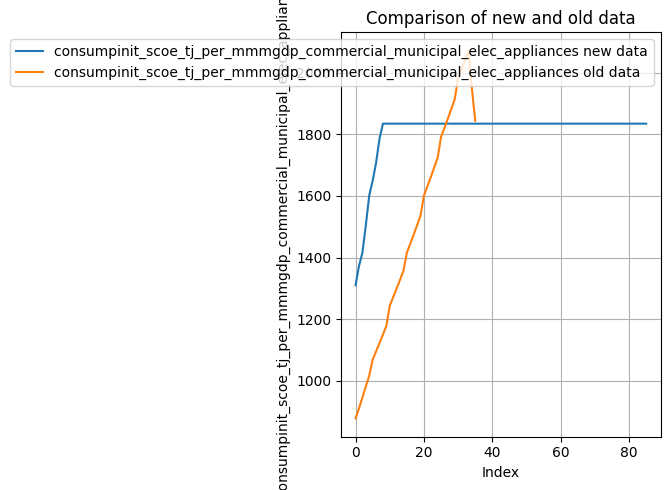

Comparing consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy...


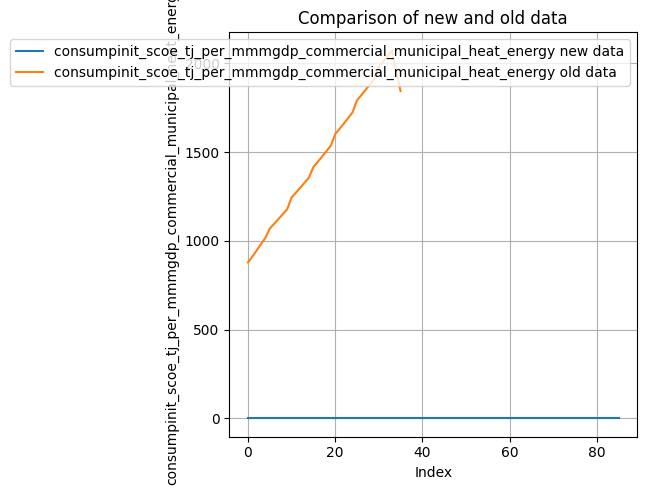

Comparing consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances...


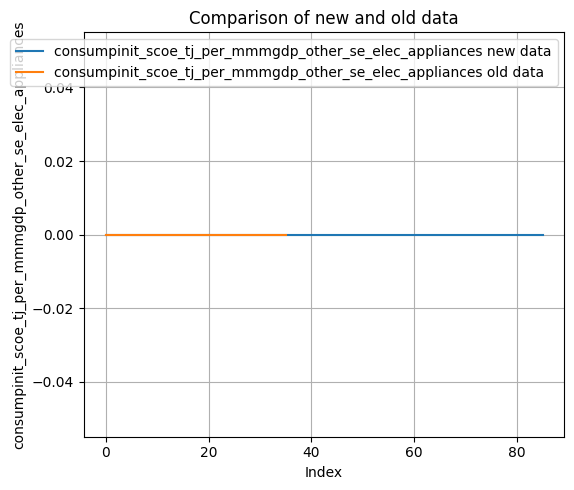

Comparing consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy...


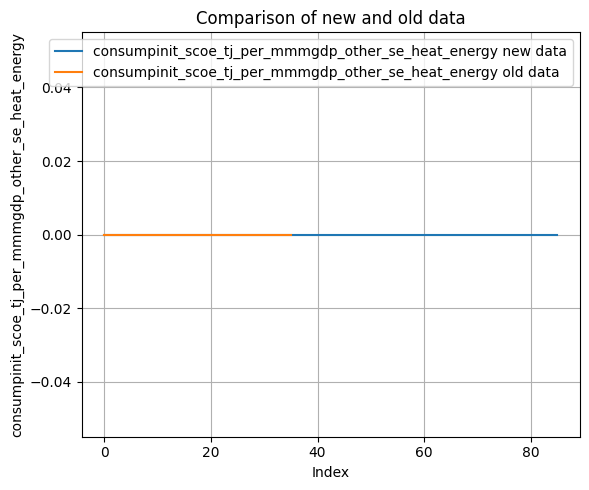

In [35]:
for var in consumpinit_scoe.columns:
    if var != 'year':
        print(f"Comparing {var}...")
        edau.compare_variables(consumpinit_scoe, uga_global_df, [var])

## Save

In [36]:
consumpinit_scoe.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "consumpinit_scoe_tj_per_gdp.csv"), index=False)